In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [14]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
# 1. Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

In [16]:
# 2. Get dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [17]:
# 3. Remove missing values
df = df.dropna()

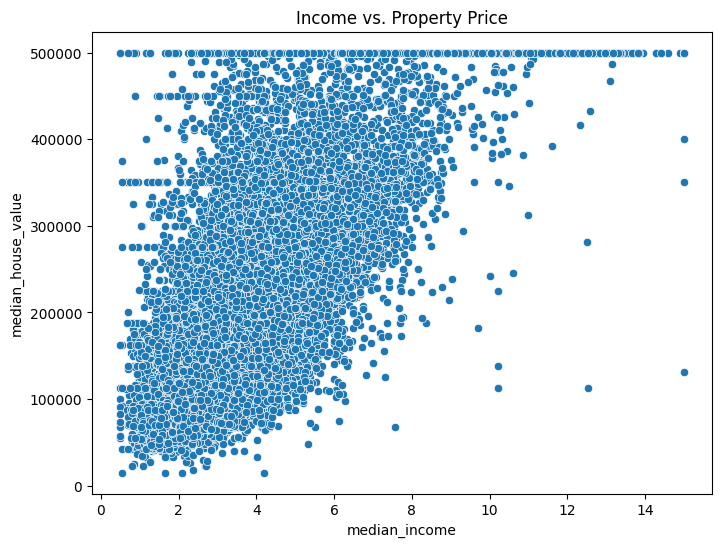

In [18]:
# 4. Visualize the distribution of house prices
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Income vs. Property Price')
plt.show()

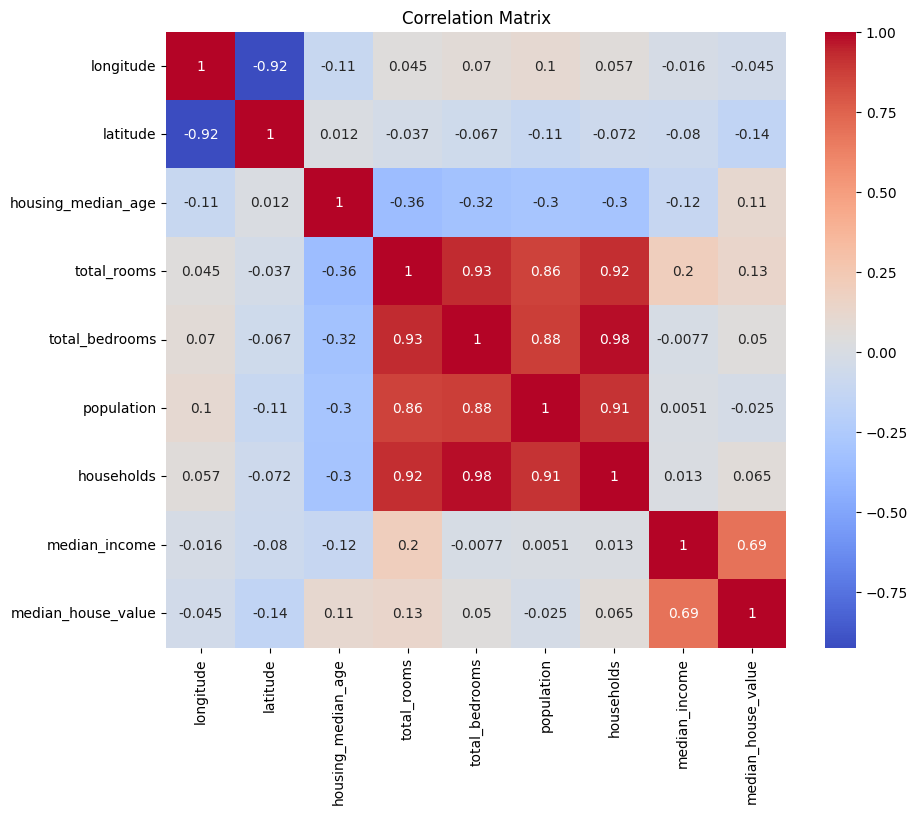

In [19]:
# 5. Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# 6. Select variables for the model
X = df[['median_income']]  # independent variable
y = df['median_house_value']  # dependent variable

In [21]:
# 7. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# 8. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# 9. Create and train the linear regression model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 7221011204.24


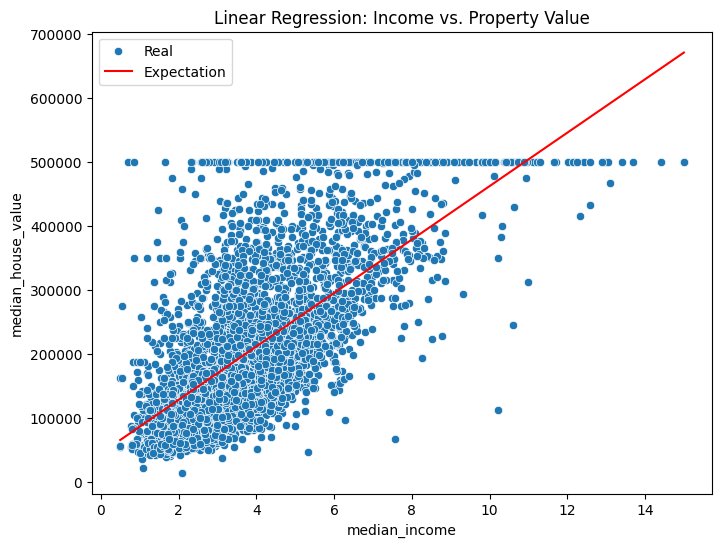

In [24]:
# 10. View regression results
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Real')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Expectation')
plt.title('Linear Regression: Income vs. Property Value')
plt.legend()
plt.show()